## Deepfake Image Detection

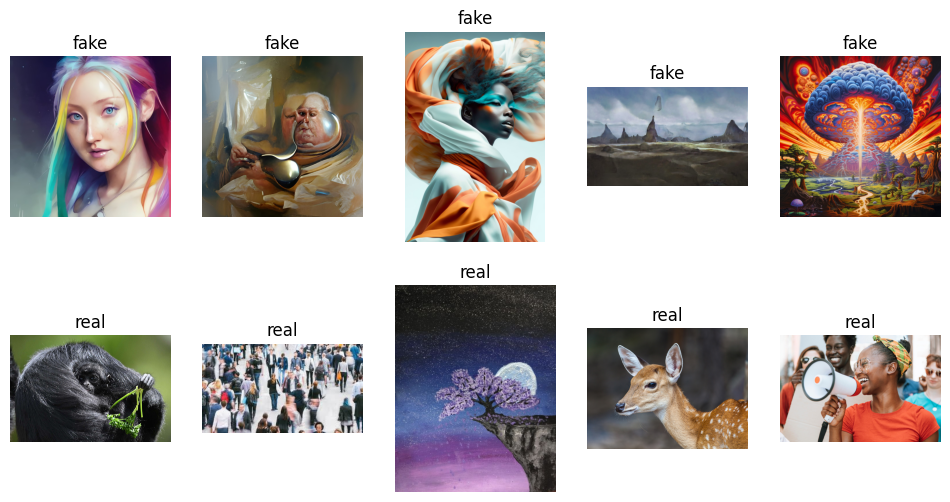

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

dataset_path = ("C://Users//KIIT//Desktop//Mini Project//archive (8)//test-20250112T065939Z-001//test")

categories = [category for category in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, category))]

sample_images = []
for category in categories:
    class_path = os.path.join(dataset_path, category)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]  
    for img in images[:5]:  
        img_path = os.path.join(class_path, img)
        sample_images.append((img_path, category))

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, (img_path, label) in enumerate(sample_images):
    img = load_img(img_path)
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")
plt.show()

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# The dataset path and categories should be defined before using them
# Example:
# dataset_path = "/path/to/dataset"
# categories = ['cat', 'dog', 'bird']

def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)  # Resize
    img_array = img_to_array(img) / 255.0  # Normalize
    return img_array

image_data = []
labels = []
label_map = {category: idx for idx, category in enumerate(categories)}

for category in categories:
    class_path = os.path.join(dataset_path, category)
    images = os.listdir(class_path)
    for img in images:
        img_path = os.path.join(class_path, img)
        try:
            image_data.append(load_and_preprocess_image(img_path))
            labels.append(label_map[category])
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Convert to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print shapes for confirmation
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train shape: (359, 128, 128, 3), Validation shape: (40, 128, 128, 3), Test shape: (100, 128, 128, 3)


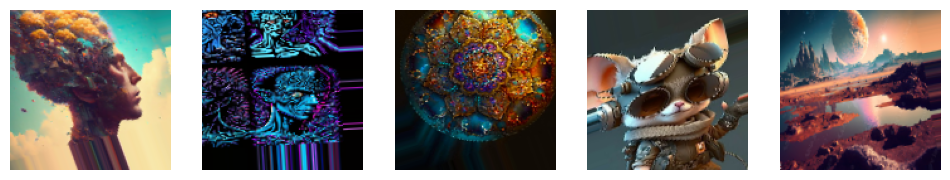

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

augmented_images = datagen.flow(X_train[:5], batch_size=5)

# Display augmented images
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, img in enumerate(augmented_images):  # Only one batch of 5 images
    if i >= 1:  # Only process the first batch
        break
    for j in range(5):  # Loop through the 5 images in the batch
        axes[j].imshow(img[j])  # img[j] is the individual image in the batch
        axes[j].axis("off")
plt.show()

In [4]:
IMG_SIZE = (128, 128)  # Resize images
BATCH_SIZE = 32

# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)  # Resize
    img_array = img_to_array(img) / 255.0  # Normalize
    return img_array

# Load all images and labels
image_data = []
labels = []
label_map = {category: idx for idx, category in enumerate(categories)}

for category in categories:
    class_path = os.path.join(dataset_path, category)
    images = os.listdir(class_path)
    for img in images:
        img_path = os.path.join(class_path, img)
        image_data.append(load_and_preprocess_image(img_path))
        labels.append(label_map[category])

# Convert to numpy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Train shape: (359, 128, 128, 3), Validation shape: (40, 128, 128, 3), Test shape: (100, 128, 128, 3)


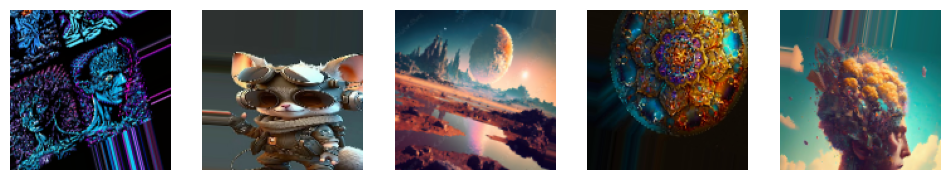

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Generate augmented images
augmented_images = datagen.flow(X_train[:5], batch_size=5)

# Display augmented images
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, img in enumerate(augmented_images):  # Only one batch of 5 images
    if i >= 1:  # Only process the first batch
        break
    for j in range(5):  # Loop through the 5 images in the batch
        axes[j].imshow(img[j])  # img[j] is the individual image in the batch
        axes[j].axis("off")
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")  # Number of categories
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=BATCH_SIZE),
                    validation_data=(X_val, y_val),
                    epochs=50,
                    verbose=1)

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.7442 - loss: 0.7858 - val_accuracy: 0.8000 - val_loss: 0.5002
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.7822 - loss: 0.5324 - val_accuracy: 0.8000 - val_loss: 0.4466
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.7578 - loss: 0.5317 - val_accuracy: 0.8000 - val_loss: 0.5656
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.7852 - loss: 0.5679 - val_accuracy: 0.8000 - val_loss: 0.4421
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.7987 - loss: 0.4487 - val_accuracy: 0.8000 - val_loss: 0.4537
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - accuracy: 0.7940 - loss: 0.4562 - val_accuracy: 0.8000 - val_loss: 0.4504
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.8059 - loss: 0.4527 - val_accuracy: 0.8000 - val_loss: 0.4627
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.7812 - loss: 0.4551 - val_accuracy: 0.

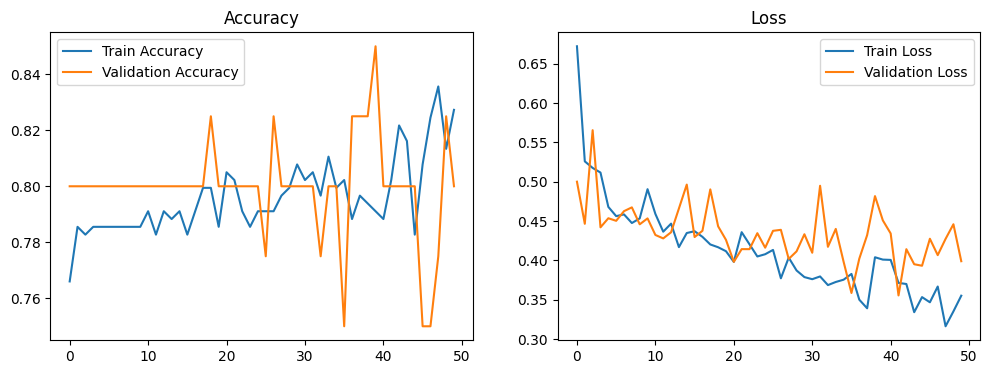

In [8]:
# Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7602 - loss: 0.9608
Test Accuracy: 0.7600


In [16]:
import tensorflow as tf

model.save('/kaggle/working/fake_image_model.keras')


In [17]:
pip install numpy opencv-python scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# ✅ 1. Check if model file exists
model_path = "C://Users//KIIT//Desktop//Mini Project//fake_image_model.keras"

if not os.path.exists(model_path):
    raise FileNotFoundError(f"❌ Model file not found: {model_path}")

# ✅ 2. Load the trained model
model = load_model(model_path)
print("✅ Model loaded successfully!")

# ✅ 3. Define image path (Make sure the file exists)
image_path = "/kaggle/input/deepfake-image-detection/test-20250112T065939Z-001/test/fake/123.jpg"

if not os.path.exists(image_path):
    raise FileNotFoundError(f"❌ Image file not found: {image_path}")

# ✅ 4. Load and preprocess the image
input_img = load_img(image_path, target_size=(128, 128))  # Load image
input_array = img_to_array(input_img)  # Convert to NumPy array
input_array = np.expand_dims(input_array, axis=0)  # Add batch dimension
input_array = input_array / 255.0  # Normalize

# ✅ 5. Get predictions from the model
predictions = model.predict(input_array)

# ✅ 6. Print raw output (prediction probabilities)
print("🔹 Raw predictions (probabilities):", predictions)

# ✅ 7. Get the predicted class
predicted_class_idx = np.argmax(predictions, axis=-1)[0]  # Get index of highest probability
class_labels = ['fake', 'real']  # Class labels

# ✅ 8. Print the predicted class
predicted_class_name = class_labels[predicted_class_idx]
print(f"🟢 Predicted class: {predicted_class_name}")


FileNotFoundError: ❌ Model file not found: C://Users//KIIT//Desktop//Mini Project//fake_image_model.keras

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define dataset path
dataset_path = "C://Users//KIIT//Desktop//Mini Project//archive (8)//train//"

# Define classes
class_labels = ["fake", "real"]

# Image Preprocessing
image_size = (128, 128)  # Resize all images to 128x128
data = []
labels = []

# Load images and extract features
for label in class_labels:
    folder_path = os.path.join(dataset_path, label)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        
        # Read and preprocess image
        img = cv2.imread(img_path)
        img = cv2.resize(img, image_size)
        img = img.flatten()  # Convert to 1D feature vector
        
        # Append data and labels
        data.append(img)
        labels.append(class_labels.index(label))  # Convert labels to numerical values

# Convert to numpy arrays
X = np.array(data)  # Features
y = np.array(labels)  # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
